In [2]:
import numpy as np
import serpentTools as st
from snapReactors.reactor_models.AutomatedSerpentModels.GCU.c3_radial_sens_2d.utilitities import*
import os
from numpy.linalg import norm
import matplotlib.image as mpimg

In [3]:
print(os.getcwd())

/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS


In [4]:
# coreresFile = '/Users/isaacnaupaaguirre/Downloads/s82d_ac_c3_gcu_coreres.main_res.m'
# coreres = st.read(coreresFile)

# ringresFile = '/Users/isaacnaupaaguirre/Downloads/s82d_ac_c3_gcu_ringres.main_res.m'
# ringres = st.read(ringresFile)

# elemresFile = '/Users/isaacnaupaaguirre/Downloads/s82d_ac_c3_gcu_elemres.main_res.m'
# elemres = st.read(elemresFile)

In [6]:
ref3DFile = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_core_axial/s83d_ac_c3_gcu_core_20lay_1.main_res.m'
ref3Dres = st.read(ref3DFile)

SERPENT Serpent 2.2.1 found in /Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_core_axial/s83d_ac_c3_gcu_core_20lay_1.main_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


### System Analysis

In [7]:
rootUni = '0'
rootUniData = ref3Dres.universes[rootUni, 0, 0, 0]

In [8]:
rootUniData.infExp.keys()

dict_keys(['infMicroFlx', 'infKinf', 'infFlx', 'infFissFlx', 'infTot', 'infCapt', 'infAbs', 'infFiss', 'infNsf', 'infNubar', 'infKappa', 'infInvv', 'infScatt0', 'infScatt1', 'infScatt2', 'infScatt3', 'infScatt4', 'infScatt5', 'infScatt6', 'infScatt7', 'infScattp0', 'infScattp1', 'infScattp2', 'infScattp3', 'infScattp4', 'infScattp5', 'infScattp6', 'infScattp7', 'infTranspxs', 'infDiffcoef', 'infRabsxs', 'infRemxs', 'infI135Yield', 'infXe135Yield', 'infPm147Yield', 'infPm148Yield', 'infPm148mYield', 'infPm149Yield', 'infSm149Yield', 'infI135MicroAbs', 'infXe135MicroAbs', 'infPm147MicroAbs', 'infPm148MicroAbs', 'infPm148mMicroAbs', 'infPm149MicroAbs', 'infSm149MicroAbs', 'infI135MacroAbs', 'infXe135MacroAbs', 'infPm147MacroAbs', 'infPm148MacroAbs', 'infPm148mMacroAbs', 'infPm149MacroAbs', 'infSm149MacroAbs', 'infChit', 'infChip', 'infChid', 'infS0', 'infS1', 'infS2', 'infS3', 'infS4', 'infS5', 'infS6', 'infS7', 'infSp0', 'infSp1', 'infSp2', 'infSp3', 'infSp4', 'infSp5', 'infSp6', 'infSp7

<AxesSubplot:xlabel='Energy [MeV]', ylabel='Cross Section  $\\pm3\\sigma$ [cm$^{-1}$]'>

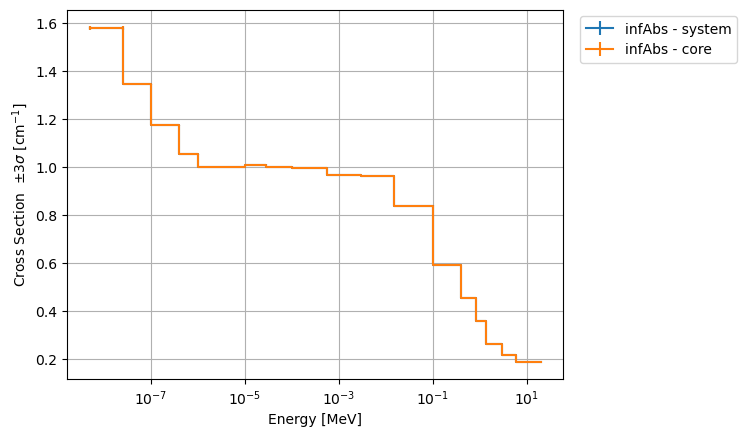

In [9]:
ax = rootUniData.plot('infTot', labels=['infAbs - system'])
ax.grid()
rootUniData.plot('infTot', ax=ax, labels = ['infAbs - core'], legend='right')

In [10]:
def condense(universe, key, useInvFlux = False):
    cond = None
    if useInvFlux:
        invFlux = np.zeros(len(universe.infExp[key]))
        for i in range(0, len(invFlux)):
            invFlux[i] = 1/universe.infExp[key][i]
        cond = np.sum(np.multiply(universe.infExp[key], invFlux)/np.sum(invFlux))
    else:
        cond = np.sum(np.multiply(universe.infExp[key], universe.infExp['infFlx']))/np.sum(universe.infExp['infFlx'])
    return cond

In [11]:
fluxweight_coreTranspxs = condense(rootUniData, 'infTranspxs')
invfluxweight_coreTranspxs = condense(rootUniData, 'infTranspxs', useInvFlux=True)

fluxweight_coreDiff = 1/(3*fluxweight_coreTranspxs)
invfluxweight_coreDiff = 1/(3*invfluxweight_coreTranspxs)

print("fluxweighted infTranspxs : {:.3f}".format(fluxweight_coreTranspxs))
print("invfluxweighted infTranspxs : {:.3f}".format(invfluxweight_coreTranspxs))

print("fluxweighted infDiff : {:.3f}".format(fluxweight_coreDiff))
print("invfluxweighted infDiff : {:.3f}".format(invfluxweight_coreDiff))

coreAbs = condense(rootUniData, 'infAbs')

fluxweight_coreDiffLen = np.sqrt(fluxweight_coreDiff/coreAbs)
invfluxweight_coreDiffLen = np.sqrt(invfluxweight_coreDiff/coreAbs)

print("fluxweighted infDiffLen : {:.3f}".format(fluxweight_coreDiffLen))
print("invfluxweighted infDiffLen : {:.3f}".format(invfluxweight_coreDiffLen))  

fluxweighted infTranspxs : 0.454
invfluxweighted infTranspxs : 0.335
fluxweighted infDiff : 0.735
invfluxweighted infDiff : 0.996
fluxweighted infDiffLen : 5.978
invfluxweighted infDiffLen : 6.961


### Radial GCU Resolution Study 2D

####  Make Sure Cases are unbiased torwards statistics on few-group data

In [12]:
maxs = []
max = None
for uni in ref3Dres.universes:
    maxs.append(np.max(ref3Dres.universes[uni].infUnc['infTot']))
print(np.max(maxs))

0.01709


In [13]:
maxs = []
max = None
for uni in coreres.universes:
    maxs.append(np.max(coreres.universes[uni].infUnc['infTot']))
print(np.max(maxs))

NameError: name 'coreres' is not defined

In [14]:
maxs = []
max = None
for uni in ringres.universes:
    maxs.append(np.max(ringres.universes[uni].infUnc['infTot']))
print(np.max(maxs))

NameError: name 'ringres' is not defined

In [15]:
maxs = []
max = None
for uni in elemres.universes:
    maxs.append(np.max(elemres.universes[uni].infUnc['infTot']))
print(np.max(maxs))

NameError: name 'elemres' is not defined

#### Keff Comparison

In [16]:
reffKeff = ref3Dres.resdata['absKeff']
print("Reference Serpent Keff: {:.5}, pcm: {}".format(reffKeff[0],reffKeff[1]*1e5))

Reference Serpent Keff: 0.98216, pcm: 14.999999999999998


In [17]:
lay20ResDF = postProcess('/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_ringbased_axial/s83d_ac_c3_gcu_core_20lay_1_out.csv', isSteady=True)
# coreResDF = postProcess('/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_coreres_out.csv', isSteady=True)
# elemResDF = postProcess('/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_elemres_out.csv', isSteady=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_ringbased_axial/s83d_ac_c3_gcu_core_20lay_1_out.csv'

In [18]:
def kToPCM(k):
    return 1e5*((k-1)/k)

In [19]:
griff_20keff = lay20ResDF['eigenvalue'][1]
# griff_rkeff = ringResDF['eigenvalue'][1]
# griff_ekeff = elemResDF['eigenvalue'][1]

print("core resolution keff: {:.5f}, pcmDiff: {:.1f}".format(griff_20keff, kToPCM(griff_20keff) - kToPCM(reffKeff[0])))
# print("ring resolution keff: {:.5f}, pcmDiff: {:.1f}".format(griff_rkeff, kToPCM(griff_rkeff) - kToPCM(reffKeff[0])))
# print("elem resolution keff: {:.5f}, pcmDiff: {:.1f}".format(griff_ekeff, kToPCM(griff_ekeff) - kToPCM(reffKeff[0])))
9.545675e-01

NameError: name 'lay20ResDF' is not defined

1. PCM difference decreases with increase in spatial resolution as espected

#### Verification of Few Group Spectrum

In [20]:
fgs_hr18 = [5.0000E-09, 2.5000E-08, 1.0000E-07, 4.0000E-07, 9.9600E-07, 3.0000E-06,
9.8770E-06, 2.7700E-05, 1.0000E-04, 5.5000E-04, 3.0000E-03, 1.5030E-02,
1.0000E-01, 4.0000E-01, 8.2100E-01, 1.3530E+00, 3.0000E+00, 6.0655E+00,
2.0000E+01]

In [21]:
refFGSFile = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_coreres.main_det0.m'
refFGSDet = st.read(refFGSFile)
refFGS = refFGSDet['fgs_spec']

In [22]:
def normZeroToOne(arr):
    normArr = np.zeros(len(arr))
    min = np.min(arr)
    max = np.max(arr)
    for i in range(0, len(arr)):
        normArr[i] = (arr[i] - min)/(max - min)
    return normArr
def normMaximum(arr):
    normArr = np.zeros(len(arr))
    max = np.max(arr)
    for i in range(0, len(arr)):
        normArr[i] = (arr[i])/(max)
        
    return normArr

<AxesSubplot:xlabel='Energy [MeV]', ylabel='Tally data normalized per unit lethargy $\\pm3\\sigma$'>

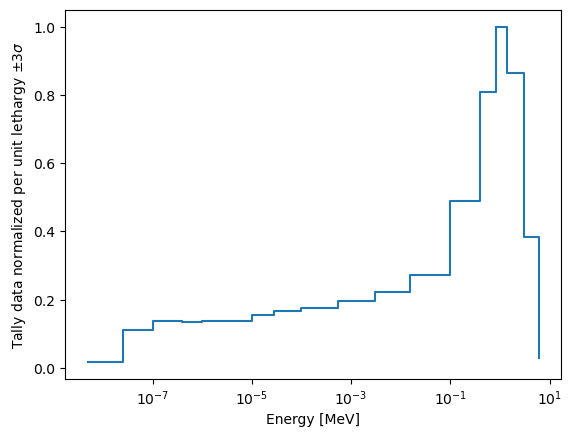

In [23]:
refFGS.spectrumPlot()

In [24]:
normRefFGS = normMaximum(refFGS.tallies)

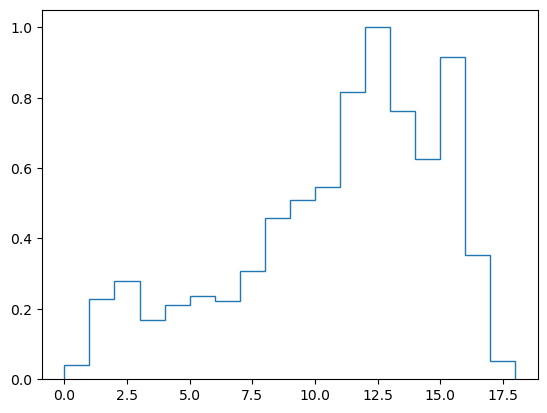

In [25]:
plt.stairs(normRefFGS)

In [23]:
#collectFGS
nFewGroups = 18
griff_coreResFGS = []
griff_ringResFGS = []
griff_elemResFGS = []
for i in range(nFewGroups-1, -1, -1):
    griff_coreResFGS.append(coreResDF['Flux{}'.format(i+1)][1])
    griff_ringResFGS.append(ringResDF['Flux{}'.format(i+1)][1])
    griff_elemResFGS.append(elemResDF['Flux{}'.format(i+1)][1])

normGriff_ringResFGS = normZeroToOne(griff_ringResFGS)
normGriff_coreResFGS = normZeroToOne(griff_coreResFGS)
normGriff_elemResFGS = normZeroToOne(griff_elemResFGS)

In [58]:
groupBins = np.linspace(0, 18, 19).astype("int")
print(groupBins)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


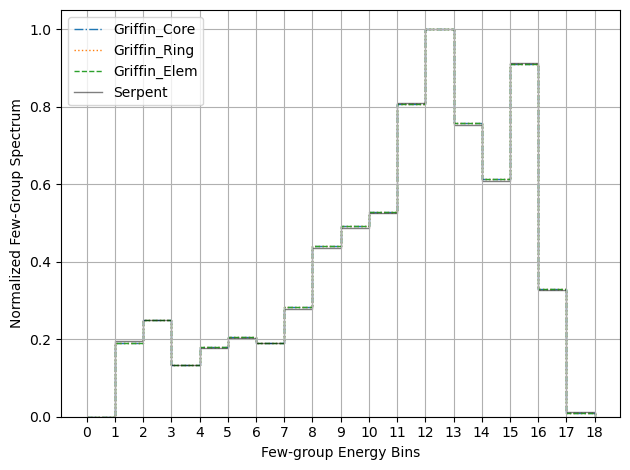

In [66]:
plt.stairs(normGriff_coreResFGS, groupBins, label = "Griffin_Core", linewidth = 1, alpha = 1, linestyle = "-.")
plt.stairs(normGriff_ringResFGS, groupBins, label = "Griffin_Ring", linewidth = 1, alpha = 1, linestyle = ":")
plt.stairs(normGriff_elemResFGS, groupBins, label = "Griffin_Elem", linewidth = 1, alpha = 1, linestyle = "--")
plt.stairs(normRefFGS, groupBins, label = "Serpent", color = "black", linewidth = 1, alpha = 0.5)
plt.xticks(groupBins)
plt.xlabel("Few-group Energy Bins")
plt.ylabel("Normalized Few-Group Spectrum")
plt.legend(loc='upper left')
plt.tight_layout()
plt.grid()

In [68]:
def calcL2NormDiffPerc(ref,  comp):
    diff = np.subtract(ref, comp)
    diffNorm  = norm(diff)
    base = norm(ref)
    return (diffNorm/base)*100

def calcPercentRelativeError(ref, comp):
    relErr = []
    diff = np.abs(np.subtract(ref, comp))

    for i in range(0, len(diff)):
        if diff[i] != 0:
            #relErr.append(2*(diff[i]/(np.abs(ref[i])+np.abs(comp[i]))))
            relErr.append(100*diff[i]/ref[i])
        else:
            relErr.append(0)
    return relErr

In [25]:
coreL2NormDiffFGS = calcL2NormDiffPerc(normRefFGS, normGriff_coreResFGS)
ringL2NormDiffFGS = calcL2NormDiffPerc(normRefFGS, normGriff_ringResFGS)
elemL2NormDiffFGS = calcL2NormDiffPerc(normRefFGS, normGriff_elemResFGS)

In [26]:
print("core resolution FGS l2normDiff (%): {:.3f}".format(coreL2NormDiffFGS))
print("ring resolution FGS l2normDiff (%): {:.3f}".format(ringL2NormDiffFGS))
print("elem resolution FGS l2normDiff (%): {:.3f}".format(elemL2NormDiffFGS))

core resolution FGS l2normDiff (%): 0.624
ring resolution FGS l2normDiff (%): 0.607
elem resolution FGS l2normDiff (%): 0.609


In [68]:
def createDetectors(unis):
    detStr = ""
    for i in range(0, len(unis)):
        detStr = detStr + 'det nuFissRate{} dr -7 void du {}\n'.format(unis[i], unis[i])
        detStr = detStr + 'det capRate{} dr -2 void du {}\n'.format(unis[i], unis[i])

    return detStr

In [71]:
uni20L = np.linspace(101, 120, 20).astype("int")
print(uni20L)

[101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120]


In [74]:
print(createDetectors(uni20L))

det nuFissRate101 dr -7 void du 101
det capRate101 dr -2 void du 101
det nuFissRate102 dr -7 void du 102
det capRate102 dr -2 void du 102
det nuFissRate103 dr -7 void du 103
det capRate103 dr -2 void du 103
det nuFissRate104 dr -7 void du 104
det capRate104 dr -2 void du 104
det nuFissRate105 dr -7 void du 105
det capRate105 dr -2 void du 105
det nuFissRate106 dr -7 void du 106
det capRate106 dr -2 void du 106
det nuFissRate107 dr -7 void du 107
det capRate107 dr -2 void du 107
det nuFissRate108 dr -7 void du 108
det capRate108 dr -2 void du 108
det nuFissRate109 dr -7 void du 109
det capRate109 dr -2 void du 109
det nuFissRate110 dr -7 void du 110
det capRate110 dr -2 void du 110
det nuFissRate111 dr -7 void du 111
det capRate111 dr -2 void du 111
det nuFissRate112 dr -7 void du 112
det capRate112 dr -2 void du 112
det nuFissRate113 dr -7 void du 113
det capRate113 dr -2 void du 113
det nuFissRate114 dr -7 void du 114
det capRate114 dr -2 void du 114
det nuFissRate115 dr -7 void du 11

#### Flux Map Comparison

In [55]:
ringRefMapFile = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_ringbased_axial/s83d_ac_c3_gcu_core_20lay_1.main_det0.m'
ringRefMapDet = st.read(ringRefMapFile, reader='det')


In [56]:
# ringRefMapFile = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_ringres.main_det0.m'
# ringRefMapDet = st.read(ringRefMapFile, reader='det')

In [57]:
ringRefMapDet.detectors

{'scalarFlux900': <serpentTools.detectors.Detector at 0x7f83d7e967f0>,
 'scalarFlux901': <serpentTools.detectors.Detector at 0x7f83d7e96a30>,
 'scalarFlux902': <serpentTools.detectors.Detector at 0x7f83d7e96310>,
 'scalarFlux903': <serpentTools.detectors.Detector at 0x7f83bec10bb0>,
 'scalarFlux904': <serpentTools.detectors.Detector at 0x7f83bec10cd0>,
 'scalarFlux905': <serpentTools.detectors.Detector at 0x7f83bec10730>,
 'scalarFlux906': <serpentTools.detectors.Detector at 0x7f83bec10c40>,
 'scalarFlux907': <serpentTools.detectors.Detector at 0x7f83bec10ee0>,
 'scalarFlux908': <serpentTools.detectors.Detector at 0x7f83bec10f10>,
 'scalarFlux909': <serpentTools.detectors.Detector at 0x7f83bec10370>,
 'scalarFlux910': <serpentTools.detectors.Detector at 0x7f83bec10dc0>,
 'scalarFlux911': <serpentTools.detectors.Detector at 0x7f83bec10460>,
 'scalarFlux912': <serpentTools.detectors.Detector at 0x7f83bec104c0>,
 'scalarFlux913': <serpentTools.detectors.Detector at 0x7f83bec10940>,
 'scal

In [58]:
def griffinFluxMapReader(path):
    keys = ['volume', 'nufiss', 'power', 'absorption', 'scalar']
    block = []
    vol = []
    nufiss = []
    pow = []
    abs = []
    scalar = []
    with open(path, "r") as f:
        lines = f.readlines()
        f.close()

    bidx = None
    eidx = None
    hasBegun = False
    for ldx, line in enumerate(lines):
        if "Block average" in line:
            bidx = ldx+2
            hasBegun = True 
        if (line == "\n") & hasBegun:
            eidx = ldx
            break
    
    data = lines[bidx:eidx]

    dicts = []

    for i in range(0, len(data)):
        vals  = data[i].split()
        block.append(vals[0])
        vol.append(float(vals[1]))
        nufiss.append(float(vals[2]))
        pow.append(float(vals[3]))
        abs.append(float(vals[4]))
        scalar.append(float(vals[5]))

        dset = [vol[i], nufiss[i], pow[i], abs[i], scalar[i]]
        dicts.append(dict(zip(keys, dset)))


    map = dict(zip(block, dicts))
    return map

In [42]:
ringGriffBlockMap = griffinFluxMapReader('/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_ringbased_axial/20lay_core.txt')

In [43]:
print(ringGriffBlockMap)

{'9': {'volume': 1550.566789, 'nufiss': 0.0, 'power': 0.0, 'absorption': 5.523572e-09, 'scalar': 0.0009766218}, '101': {'volume': 681.023327, 'nufiss': 1.744473e-05, 'power': 2.322583e-16, 'absorption': 1.047654e-05, 'scalar': 0.000337423}, '102': {'volume': 681.023327, 'nufiss': 3.36755e-05, 'power': 4.485396e-16, 'absorption': 2.012843e-05, 'scalar': 0.0005785439}, '103': {'volume': 681.023327, 'nufiss': 4.768159e-05, 'power': 6.351515e-16, 'absorption': 2.848187e-05, 'scalar': 0.0007952079}, '104': {'volume': 681.023327, 'nufiss': 6.031273e-05, 'power': 8.034268e-16, 'absorption': 3.598564e-05, 'scalar': 0.0009965403}, '105': {'volume': 681.023327, 'nufiss': 7.159043e-05, 'power': 9.536619e-16, 'absorption': 4.272313e-05, 'scalar': 0.001179604}, '106': {'volume': 681.023327, 'nufiss': 8.154471e-05, 'power': 1.086264e-15, 'absorption': 4.864612e-05, 'scalar': 0.001340956}, '107': {'volume': 681.023327, 'nufiss': 8.970529e-05, 'power': 1.194967e-15, 'absorption': 5.350229e-05, 'scalar

In [44]:
def getBlock2UniMap(df, blockMap):
    uniMap = {}
    blocks = list(df['Block Name'])
    unis = list(df['material_id'])

    bkeyu = {}

    for bdx, block in enumerate(blocks):
        bkeyu[block.replace("block_", "")] = str(int(unis[bdx]))

    for block in blockMap:
        uniMap[bkeyu[block]] = blockMap[block]
    
    return uniMap

In [45]:
def getUni2BlockMap(df, uniMap):
    blockMap = {}

    blocks = list(df['Block Name'])
    unis = list(df['material_id'])

    ukeyb = {}

    for bdx, block in enumerate(blocks):
        ukeyb[str(int(unis[bdx]))] = block.replace("block_", "")

    for uni in uniMap:
        # uniMap[bkeyu[block]] = blockMap[block]

        blockMap[ukeyb[uni]] = uniMap[str(uni)]
    return blockMap

In [46]:
# corePointData = pd.read_csv('snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_coreres_cellPointdata.csv')
ringPointData = pd.read_csv('/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_ringbased_axial/s83d_ac_c3_gcu_core_20lay_1_out_cellPointData.csv')
# elemPointData = pd.read_csv('snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_elemres_cellPointdata.csv')

In [47]:
# coreGriffMap = getBlock2UniMap(corePointData, coreGriffBlockMap)
ringGriffMap = getBlock2UniMap(ringPointData, ringGriffBlockMap)
# elemGriffMap = getBlock2UniMap(elemPointData, elemGriffBlockMap)

In [48]:
# print(coreGriffMap)
print(ringGriffMap)
# print(elemGriffMap)

{'900': {'volume': 1550.566789, 'nufiss': 0.0, 'power': 0.0, 'absorption': 5.523572e-09, 'scalar': 0.0009766218}, '101': {'volume': 681.023327, 'nufiss': 1.744473e-05, 'power': 2.322583e-16, 'absorption': 1.047654e-05, 'scalar': 0.000337423}, '102': {'volume': 681.023327, 'nufiss': 3.36755e-05, 'power': 4.485396e-16, 'absorption': 2.012843e-05, 'scalar': 0.0005785439}, '103': {'volume': 681.023327, 'nufiss': 4.768159e-05, 'power': 6.351515e-16, 'absorption': 2.848187e-05, 'scalar': 0.0007952079}, '104': {'volume': 681.023327, 'nufiss': 6.031273e-05, 'power': 8.034268e-16, 'absorption': 3.598564e-05, 'scalar': 0.0009965403}, '105': {'volume': 681.023327, 'nufiss': 7.159043e-05, 'power': 9.536619e-16, 'absorption': 4.272313e-05, 'scalar': 0.001179604}, '106': {'volume': 681.023327, 'nufiss': 8.154471e-05, 'power': 1.086264e-15, 'absorption': 4.864612e-05, 'scalar': 0.001340956}, '107': {'volume': 681.023327, 'nufiss': 8.970529e-05, 'power': 1.194967e-15, 'absorption': 5.350229e-05, 'scal

In [49]:
# coreUnis = list(coreGriffMap.keys())
ringUnis = list(ringGriffMap.keys())
# elemUnis = list(elemGriffMap.keys())

# print(createDetectors(coreUnis))
# print(createDetectors(ringUnis))
# print(createDetectors(elemUnis))

In [50]:
def getUniValsList(map, attr):
    vals = []
    for uni in map:
        vals.append(map[uni][attr])
    return vals

In [60]:
coreNuFissMap = {}
coreCapMap = {}

coreNuFiss = []
coreCap = []

ringNuFissMap = {}
ringCapMap = {}

ringNuFiss = []
ringCap = []

elemNuFissMap = {}
elemCapMap = {}

elemNuFiss = []
elemCap = []

# for uni in coreUnis:
#     coreNuFissMap[uni] = coreRefMapDet["nuFissRate{}".format(uni)]
#     coreCapMap[uni] = coreRefMapDet["capRate{}".format(uni)]

for uni in ringUnis:
    ringNuFissMap[uni] = ringRefMapDet["nuFissRate{}".format(uni)]
    ringCapMap[uni] = ringRefMapDet["scalarFlux{}".format(uni)]

# for uni in elemUnis:
#     elemNuFissMap[uni] = elemRefMapDet["nuFissRate{}".format(uni)]
#     elemCapMap[uni] = elemRefMapDet["capRate{}".format(uni)]

In [61]:
# for uni in coreNuFissMap:
#     coreNuFiss.append(coreNuFissMap[uni].tallies/coreGriffMap[uni]['volume'])
#     coreCap.append(coreCapMap[uni].tallies/coreGriffMap[uni]['volume'])

for uni in ringNuFissMap:
    ringNuFiss.append(ringNuFissMap[uni].tallies/ringGriffMap[uni]['volume'])
    ringCap.append(ringCapMap[uni].tallies/ringGriffMap[uni]['volume'])

# for uni in elemNuFissMap:
#     elemNuFiss.append(elemNuFissMap[uni].tallies/elemGriffMap[uni]['volume'])
#     elemCap.append(elemCapMap[uni].tallies/elemGriffMap[uni]['volume'])

In [40]:
# elemNuFissBlockMap = getUni2BlockMap(elemPointData, elemNuFissMap)

In [71]:
# griffCoreNuFiss = getUniValsList(coreGriffMap, 'nufiss')
griffRingNuFiss = getUniValsList(ringGriffMap, 'nufiss')
griffRingCapture = getUniValsList(ringGriffMap, 'scalar')
# griffElemNuFiss = getUniValsList(elemGriffMap, 'nufiss')

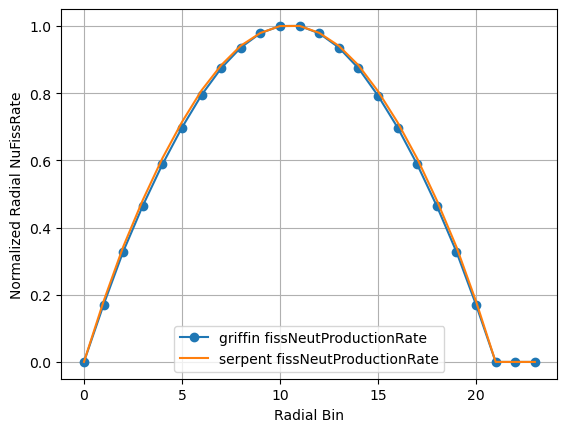

In [65]:
plt.plot(normZeroToOne(griffRingNuFiss), label = "griffin fissNeutProductionRate", marker = "o")
plt.plot(normZeroToOne(ringNuFiss), label = "serpent fissNeutProductionRate")
plt.ylabel("Normalized Radial NuFissRate")
plt.xlabel("Radial Bin")
plt.legend()
plt.grid()

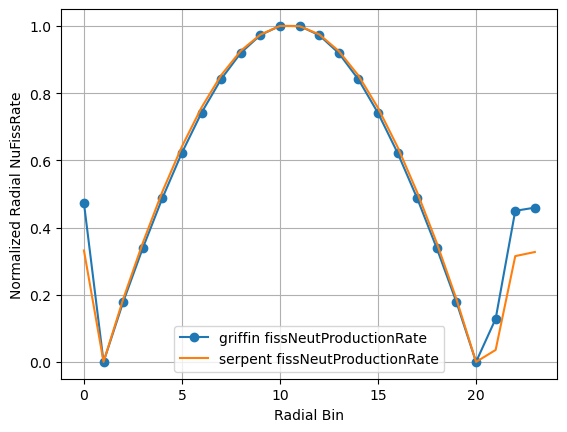

In [73]:
plt.plot(normZeroToOne(griffRingCapture), label = "griffin fissNeutProductionRate", marker = "o")
plt.plot(normZeroToOne(ringCap), label = "serpent fissNeutProductionRate")
plt.ylabel("Normalized Radial NuFissRate")
plt.xlabel("Radial Bin")
plt.legend()
plt.grid()

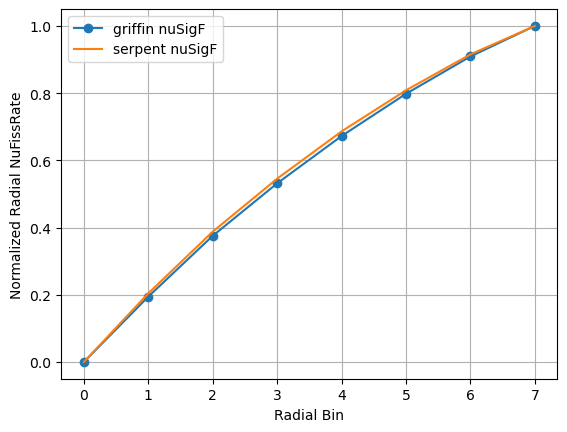

In [74]:
plt.plot(normZeroToOne(griffRingNuFiss[0:8]), label = "griffin nuSigF", marker = "o")
plt.plot(normZeroToOne(ringNuFiss[0:8]), label = "serpent nuSigF")
plt.ylabel("Normalized Radial NuFissRate")
plt.xlabel("Radial Bin")
plt.legend()
plt.grid()

In [70]:
ringL2NormDiffNuFiss = calcL2NormDiffPerc(normZeroToOne(ringNuFiss), normZeroToOne(griffRingNuFiss))
print("ring resolution NuFissRate l2normDiff (%): {:.3f}".format(ringL2NormDiffNuFiss))

ring resolution NuFissRate l2normDiff (%): 1.633


In [75]:
# coreNuFissRateRelError = calcPercentRelativeError(normZeroToOne(coreNuFiss), normZeroToOne(griffCoreNuFiss))
# coreNuFissRateRelErrorMap = dict(zip(coreUnis, coreNuFissRateRelError))

ringNuFissRateRelError = calcPercentRelativeError(normZeroToOne(ringNuFiss), normZeroToOne(griffRingNuFiss))
ringNuFissRateRelErrorMap = dict(zip(ringUnis, ringNuFissRateRelError))

ringCaptureRateRelError = calcPercentRelativeError(normZeroToOne(ringCap), normZeroToOne(griffRingCapture))
ringCaptureRateRelErrorMap = dict(zip(ringUnis, ringCaptureRateRelError))

# elemNuFissRateRelError = calcPercentRelativeError(normZeroToOne(elemNuFiss), normZeroToOne(griffElemNuFiss))
# elemNuFissRateRelErrorMap = dict(zip(elemUnis, elemNuFissRateRelError))

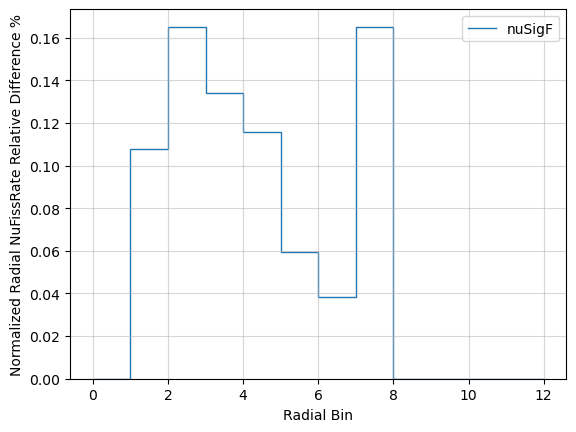

In [46]:
plt.stairs(ringNuFissRateRelError , label = "nuSigF", alpha = 1)
plt.ylabel("Normalized Radial NuFissRate Relative Difference %")
plt.xlabel("Radial Bin")
plt.legend()
plt.grid(alpha = 0.5)

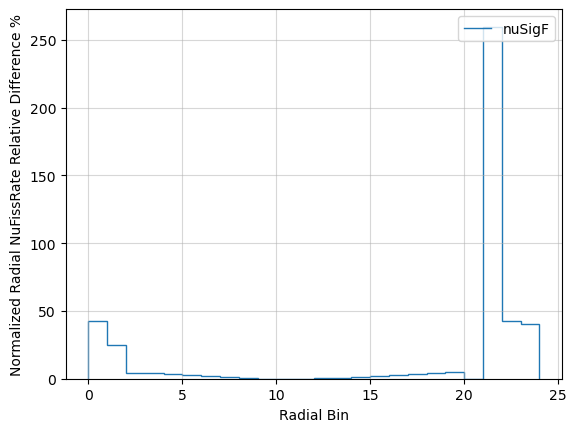

In [76]:
plt.stairs(ringCaptureRateRelError , label = "nuSigF", alpha = 1)
plt.ylabel("Normalized Radial NuFissRate Relative Difference %")
plt.xlabel("Radial Bin")
plt.legend()
plt.grid(alpha = 0.5)

In [77]:
def createAppendCSV(cellData, keys, params, vals, exportPath, useBlockId = False):
    xyz = ['x', 'y', 'z']

    for param in params:
        xyz.append(param)

    appendDF = pd.DataFrame(columns=xyz)

    map = {}

    for key in keys:
        for pdx, param in enumerate(params):
            map[key] = {}
            
    for kdx, key in enumerate(keys):
        for pdx, param in enumerate(params):
            map[key][param] = vals[pdx][kdx]

    
    if not useBlockId:
        pointKeys = np.array(list(cellData['material_id'])).astype('int')
    else:
        pointKeys = []
        blocks = list(cellData['Block Name'])
        for i in range(0, len(blocks)):
            pointKeys.append(int(blocks[i].replace("block_", "")))

    appendDF['x'] = list(cellData['Points_0'])
    appendDF['y'] = list(cellData['Points_1'])
    appendDF['z'] = list(cellData['Points_2'])

    for param in params:
        pointData = []
        for i in range(0, len(pointKeys)):
            pointData.append(map[str(pointKeys[i])][param])
        
        appendDF[param] = pointData

    appendDF.to_csv(exportPath, index=False)
    
    return appendDF

In [79]:
# coreParams = ['nuFissRate', 'nuFissRateRelError']
# coreVals = [getUniValsList(coreGriffMap, 'nufiss'), coreNuFissRateRelError]
# corePath = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_coreres_cellPointdataAppend.csv'

ringParams = ['nuFissRate', 'nuFissRateRelError', 'scalarFlux', 'scalarFluxRelError']
ringVals = [getUniValsList(ringGriffMap, 'nufiss'), ringNuFissRateRelError, getUniValsList(ringGriffMap, 'scalar'), ringCaptureRateRelError]
ringPath = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_ringbased_axial/s83d_ac_c3_gcu_core_20lay_1_out_cellPointDataAppend.csv'

# elemParams = ['nuFissRate', 'nuFissRateRelError']
# elemVals = [getUniValsList(elemGriffMap, 'nufiss'), elemNuFissRateRelError]
# elemPath = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_elemres_cellPointdataAppend.csv'

# createAppendCSV(corePointData, coreUnis, coreParams, coreVals, corePath)
createAppendCSV(ringPointData, ringUnis, ringParams, ringVals, ringPath)
# createAppendCSV(elemPointData, elemUnis, elemParams, elemVals, elemPath);

,x,y,z,nuFissRate,nuFissRateRelError,scalarFlux,scalarFluxRelError
0,-4.34340,-10.91510,1.77800,0.00000,0.00000,0.00098,42.52731
1,-4.34340,-10.86650,1.77800,0.00000,0.00000,0.00098,42.52731
2,-4.51879,-10.84360,1.77800,0.00000,0.00000,0.00098,42.52731
3,-4.34340,-10.91510,0.00000,0.00000,0.00000,0.00098,42.52731
4,-4.34340,-10.86650,0.00000,0.00000,0.00000,0.00098,42.52731
...,...,...,...,...,...,...,...
180701,11.12030,-3.78705,35.56000,0.00000,0.00000,0.00096,40.38222
180702,11.04420,-3.73087,35.56000,0.00000,0.00000,0.00096,40.38222
180703,11.19160,-3.57110,35.56000,0.00000,0.00000,0.00096,40.38222
180704,11.14960,-3.54829,35.56000,0.00000,0.00000,0.00096,40.38222


#### Element Based Flux Map
![alt text](elem_flux.png "Title")

#### Element Based - Elem XS Flux Rel Error Map
![alt text](elem_flux_relerr.png "Title")

#### Element Based - Ring XS Flux Rel Error Map
![alt text](elem_ringxs_flux_relerr.png "Title")

#### Element Based - Core XS Flux Rel Error Map
![alt text](elem_corexs_flux_relerr.png "Title")